In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')

In [3]:
print("-------------Train Data Shape-------------------")
print(train.shape)
print('---------------Test Data Shape-----------------')
print(test.shape)
print('-------------Train Data Decribe-------------------')
print(train.describe())
print('-------------Test Data Describe-------------------')
print(test.describe())
print('--------------Train Data Info------------------')
print(train.info)
print('-------------Test Data Info-------------------')
print(test.info)

-------------Train Data Shape-------------------
(7905, 20)
---------------Test Data Shape-----------------
(5271, 19)
-------------Train Data Decribe-------------------
                id       N_Days           Age    Bilirubin  Cholesterol  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   


In [4]:
for col in train.columns:
    print(train[col].value_counts())

id
0       1
5280    1
5278    1
5277    1
5276    1
       ..
2631    1
2630    1
2629    1
2628    1
7904    1
Name: count, Length: 7905, dtype: int64
N_Days
1216    117
1434    105
769      83
3445     73
1765     64
       ... 
1870      1
2523      1
1214      1
3492      1
214       1
Name: count, Length: 461, dtype: int64
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Age
22369    79
22388    71
20684    71
19060    70
16279    66
         ..
16939     1
13728     1
23111     1
13170     1
18628     1
Name: count, Length: 391, dtype: int64
Sex
F    7336
M     569
Name: count, dtype: int64
Ascites
N    7525
Y     380
Name: count, dtype: int64
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64
Spiders
N    5966
Y    1939
Name: count, dtype: int64
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64
Bilirubin
0.6     847
0.7     653
0.8     613
0.9     608
0.5     552
       ... 
9.0       1
12.7      1
14.6      1
11.3      1
21.9  

In [5]:
print(train.columns)

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')


In [6]:
categorical_feat = ['Drug','Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema','Stage' ]

In [7]:
numerical_feat = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

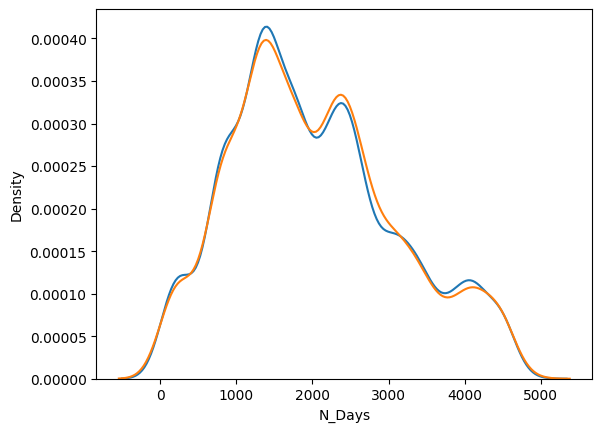

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

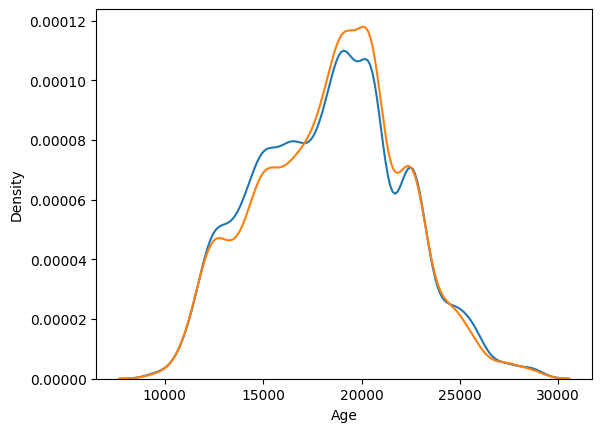

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

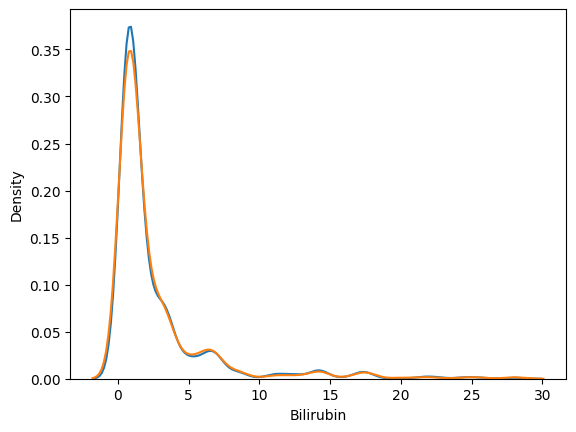

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

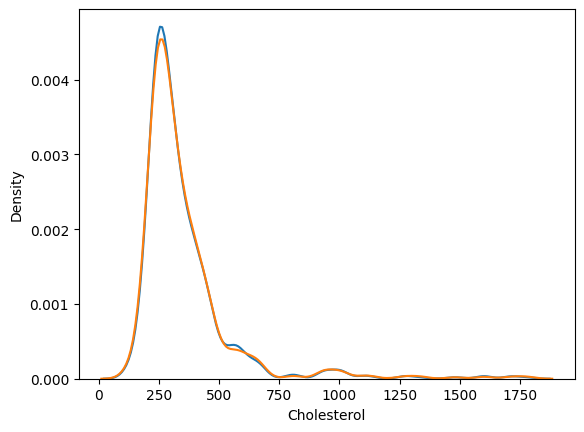

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

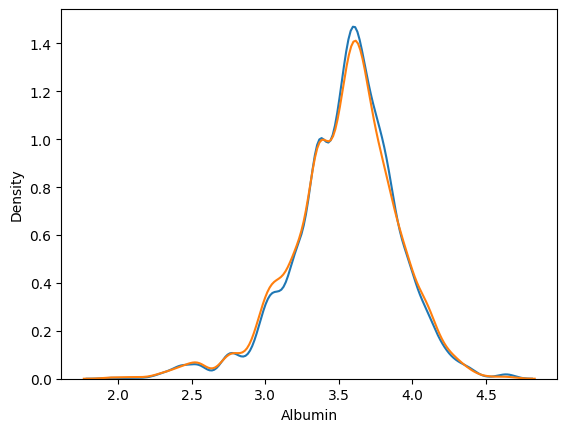

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

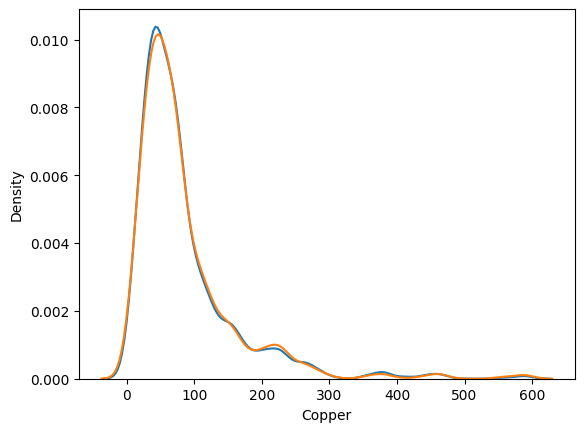

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

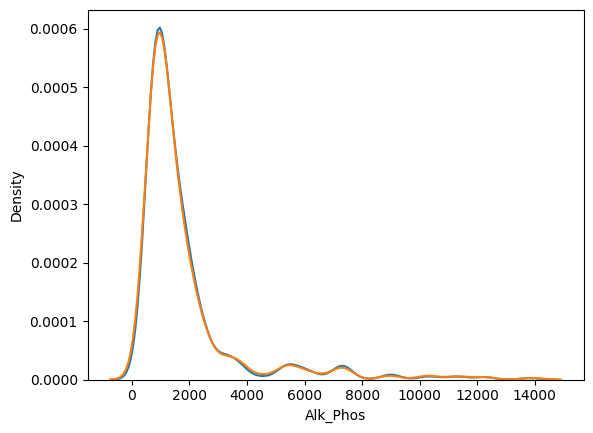

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

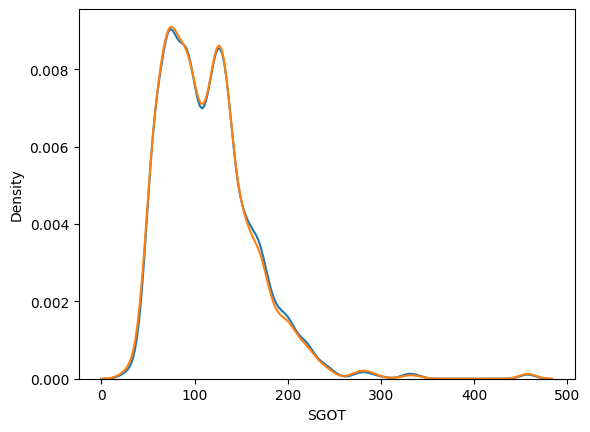

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

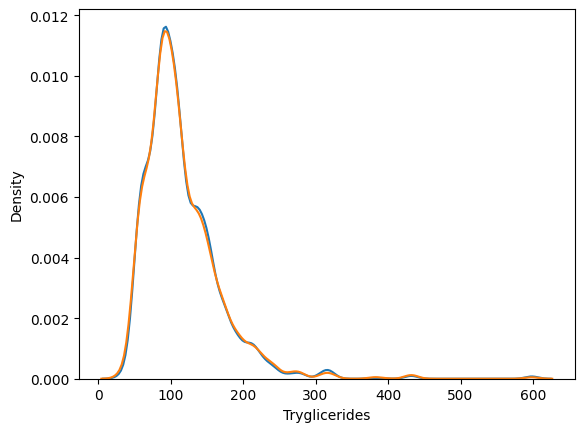

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

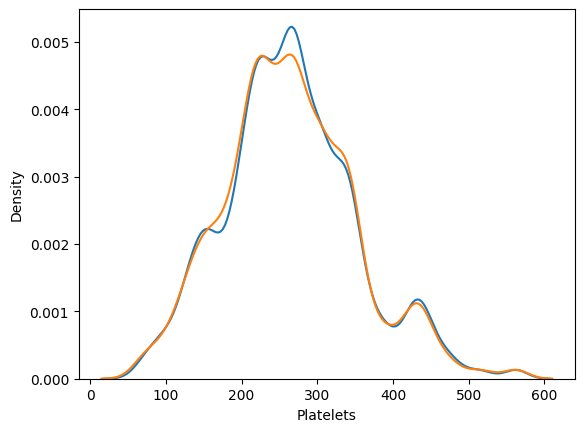

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

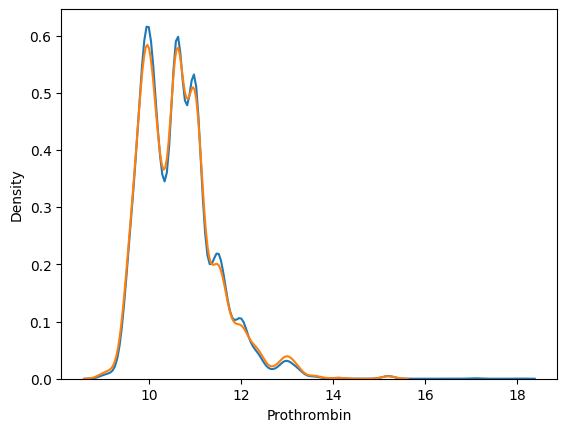

In [9]:
for col in numerical_feat:
    sns.kdeplot(data=train[col])
    sns.kdeplot(data=test[col])
    plt.show()

In [10]:
numerical_df = train[numerical_feat]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

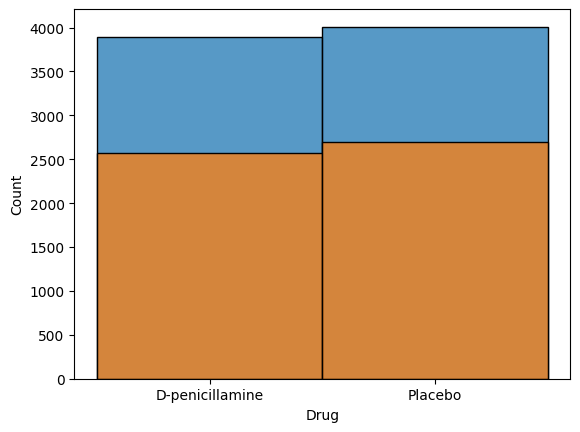

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

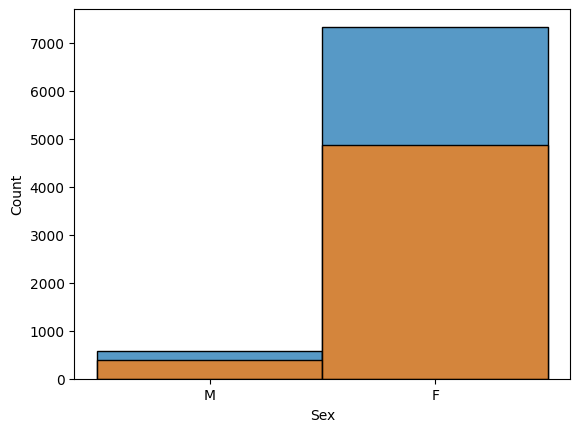

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

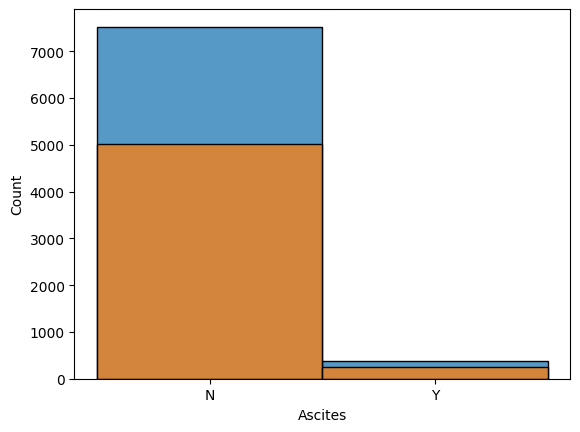

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

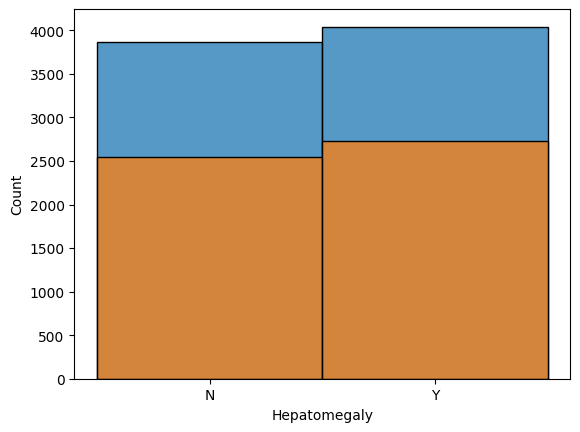

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

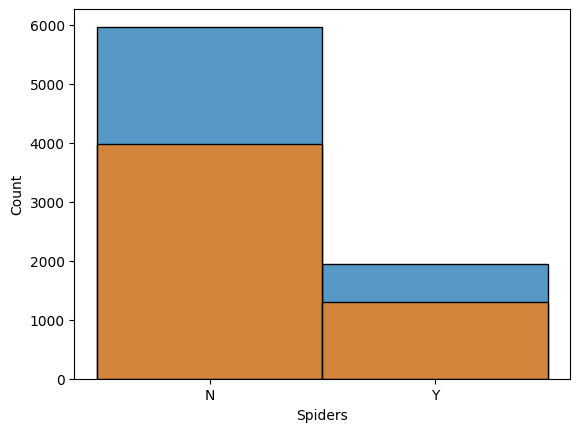

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

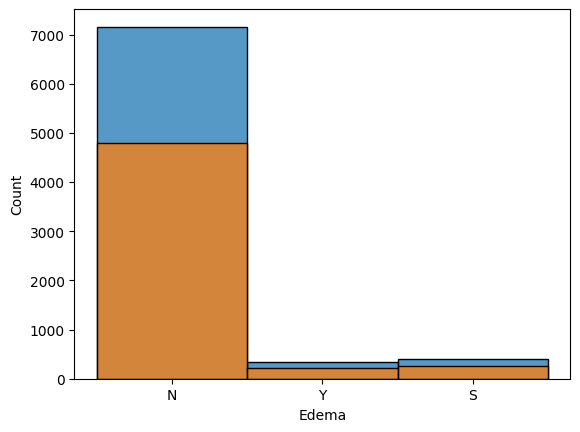

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

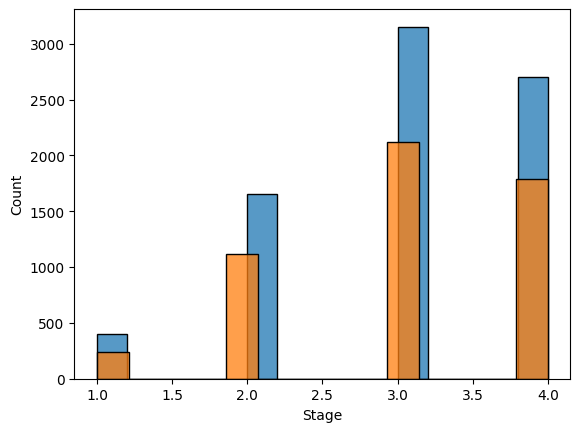

In [11]:
for col in categorical_feat:
    sns.histplot(train[col])
    sns.histplot(test[col])
    plt.show()

In [12]:
train[categorical_feat] = train[categorical_feat].astype('category')
test[categorical_feat] = test[categorical_feat].astype('category')

In [13]:
# copy the data 
train_minmax = train.copy() 
test_minmax = test.copy()  
# apply normalization techniques 
for col in numerical_feat: 
    train_minmax[col] = (train_minmax[col] - train_minmax[col].min()) / (train_minmax[col].max() - train_minmax[col].min())     
    test_minmax[col] = (test_minmax[col] - test_minmax[col].min()) / (test_minmax[col].max() - test_minmax[col].min())     

    
train_minmax.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,0.201515,D-penicillamine,0.626391,M,N,N,N,N,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778,3.0,D
1,1,0.532814,Placebo,0.505931,F,N,N,N,N,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222,3.0,C
2,2,0.712453,Placebo,0.216723,F,N,Y,Y,Y,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000,4.0,D
3,3,0.533235,Placebo,0.465148,F,N,N,N,N,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889,3.0,C
4,4,0.157131,Placebo,0.370565,F,N,Y,N,N,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778,4.0,C


In [14]:
train_converted = pd.get_dummies(train_minmax.drop(columns=['Status']), drop_first=True, dtype=float)
test_converted = pd.get_dummies(test_minmax, drop_first=True, dtype=float)

In [15]:
train_converted.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,0,0.201515,0.626391,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.532814,0.505931,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.712453,0.216723,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,0.533235,0.465148,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.157131,0.370565,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

In [17]:
test_converted.T

,0,1,2,3,4,5,6,7,8,9,...,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270
id,7905.000000,7906.000000,7907.000000,7908.000000,7909.000000,7910.000000,7911.000000,7912.000000,7913.000000,7914.000000,...,13166.000000,13167.000000,13168.000000,13169.000000,13170.000000,13171.000000,13172.000000,13173.000000,13174.000000,13175.000000
N_Days,0.798906,0.510517,0.002103,0.481489,0.331090,0.292806,0.366849,0.396298,0.000000,0.362642,...,0.217922,0.319100,0.481910,0.250947,0.532604,0.595078,0.363694,0.771140,0.247160,0.469289
Age,0.531493,0.282228,0.186385,0.572748,0.645916,0.572748,0.496641,0.545664,0.759290,1.000000,...,0.518161,0.347365,0.694835,0.692788,0.315662,0.140720,0.798079,0.387991,0.114161,0.629960
Bilirubin,0.032491,0.028881,0.061372,0.010830,0.039711,0.018051,0.003610,0.054152,0.635379,0.220217,...,0.068592,0.014440,0.010830,0.151625,0.018051,0.036101,0.007220,0.018051,0.014440,0.061372
Cholesterol,0.257402,0.326284,0.018731,0.104532,0.094864,0.047130,0.092447,0.074924,0.035045,0.074320,...,0.273112,0.058610,0.069486,0.125680,0.058610,0.109970,0.059819,0.117825,0.126284,0.067674
Albumin,0.526119,0.843284,0.373134,0.705224,0.376866,0.738806,0.630597,0.485075,0.052239,0.518657,...,0.705224,0.559701,0.649254,0.485075,0.705224,0.548507,0.794776,0.794776,0.686567,0.544776
Copper,0.104452,0.154110,0.071918,0.061644,0.200342,0.058219,0.035959,0.102740,0.369863,0.643836,...,0.154110,0.082192,0.032534,0.121575,0.061644,0.121575,0.200342,0.015411,0.082192,0.023973
Alk_Phos,0.099238,0.071316,0.049509,0.019523,0.060486,0.045825,0.028143,0.429723,0.030648,0.051129,...,0.139611,0.054666,0.040152,0.116994,0.029175,0.077799,0.027554,0.099312,0.028659,0.099238
SGOT,0.291367,0.291367,0.100719,0.230216,0.228939,0.071942,0.133790,0.079554,0.723254,0.305755,...,0.136691,0.136691,0.115108,0.154676,0.143885,0.275354,0.122302,0.334532,0.071130,0.334532
Tryglicerides,0.100885,0.215929,0.120354,0.040708,0.164602,0.040708,0.254867,0.104425,0.346903,0.214159,...,0.214159,0.286726,0.040708,0.178761,0.171681,0.019469,0.107965,0.065487,0.164602,0.088496


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
X = train_converted.drop(columns=['id'])
y = train_minmax['Status'].astype("category")
y = le.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [21]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate' : [0.001, 0.01, 0.02, 0.05],
        'n_estimators' : [100, 500, 1000]
        }

In [22]:
xgb_clf = XGBClassifier(objective='multi:softmax', enable_categorical=True)

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
random_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=100, scoring='neg_log_loss', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=0 )

In [24]:
random_clf.fit(X_train, y_train)
print(random_clf.best_estimator_)
y_pred = random_clf.predict_proba(X_test)
l_loss = log_loss(y_test, y_pred)
print(l_loss)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV 3/5] END colsample_bytree=0.8, gamma=2, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0;, score=-0.456 total time=   2.0s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1000, subsample=0.6;, score=-0.438 total time=   7.2s
[CV 2/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.6;, score=-0.483 total time=   4.3s
[CV 5/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=1000, subsample=0.6;, score=-0.447 total time=   3.5s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.02, max_depth=4, min_child_weight=10, n_estimators=1000, subsample=1.0;, score=-0.436 total time=   4.8s
[CV 3/5] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.8;, score=-0.660 total time=   7.8s
[CV 2/5] 

In [25]:
test_converted.head()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,7905,0.798906,0.531493,0.032491,0.257402,0.526119,0.104452,0.099238,0.291367,0.100885,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7906,0.510517,0.282228,0.028881,0.326284,0.843284,0.154110,0.071316,0.291367,0.215929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7907,0.002103,0.186385,0.061372,0.018731,0.373134,0.071918,0.049509,0.100719,0.120354,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7908,0.481489,0.572748,0.010830,0.104532,0.705224,0.061644,0.019523,0.230216,0.040708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7909,0.331090,0.645916,0.039711,0.094864,0.376866,0.200342,0.060486,0.228939,0.164602,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
preds = random_clf.predict_proba(test_converted.drop(columns=['id']))
preds = pd.DataFrame(preds, columns = ['Status_C', 'Status_CL', 'Status_D'])

In [27]:
submission = pd.concat([test_converted.id, preds], axis=1)
submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.405380,0.027676,0.566944
1,7906,0.628156,0.170763,0.201081
2,7907,0.037197,0.015415,0.947389
3,7908,0.923617,0.003745,0.072638
4,7909,0.669649,0.074012,0.256339


In [28]:
submission.to_csv('submission.csv', index=False)